## Assumptions of Linear Regression

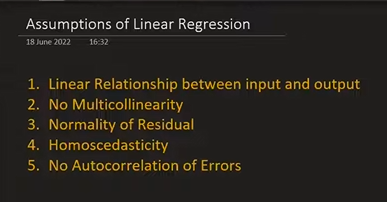

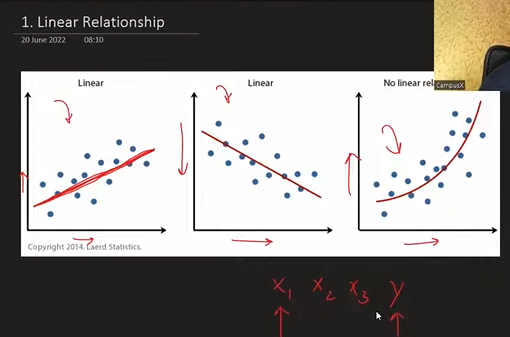

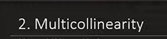

Multicollinearity shouldn't be present because if we change one coefficient, then it has no effect on others. If it exists, then linear regression won't work well

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [4]:
X = df.iloc[:,0:3].values
y = df.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [7]:
# Residual
y_pred = model.predict(X_test)
residual = y_test - y_pred

## 1. Linear Relationship

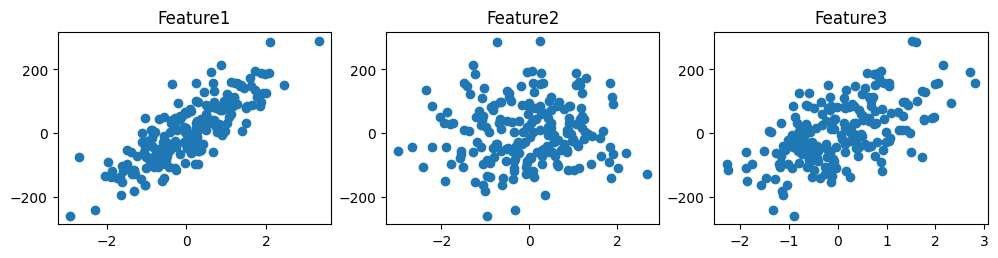

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))

ax1.scatter(df['feature1'], df['target'])
ax1.set_title("Feature1")
ax2.scatter(df['feature2'], df['target'])
ax2.set_title("Feature2")
ax3.scatter(df['feature3'], df['target'])
ax3.set_title("Feature3")

plt.show()

## 2. Multicollinearity

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))

In [10]:
pd.DataFrame({'vif': vif}, index=df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.010326,1.009871,1.01395


<Axes: >

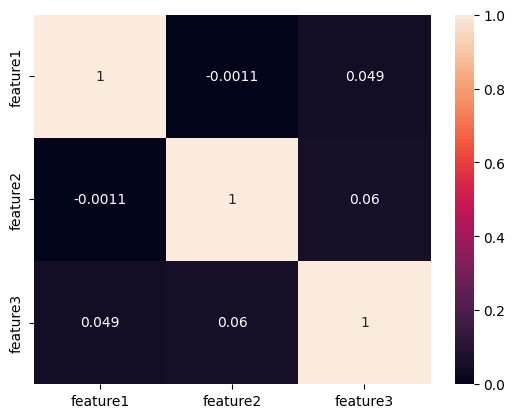

In [11]:
# Another Technique
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)

## 3. Normality of Residual

Residual is (y_pred - y_actual). This should in a normal distribution

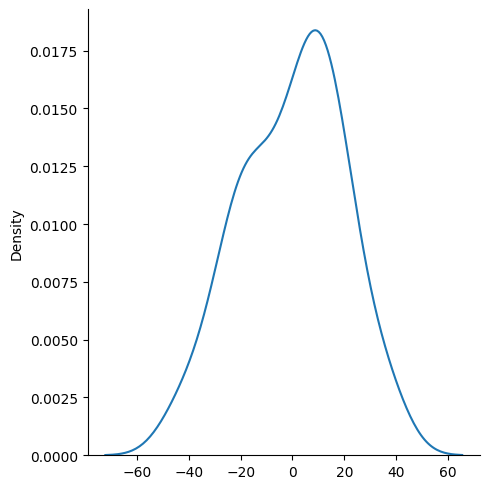

In [12]:
sns.displot(residual,kind='kde')

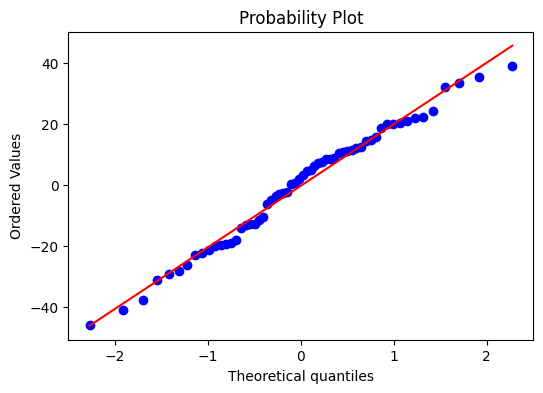

In [13]:
# QQ Plot

import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)

plt.show()

## 4. Homoscedasticity

The spread of errors should be uniform across the x-axis

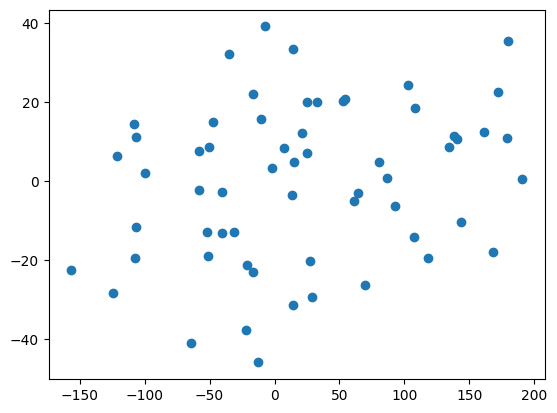

In [14]:
plt.scatter(y_pred,residual)

## 5. Autocorrelation of Residuals

No pattern should form when we plot the errors

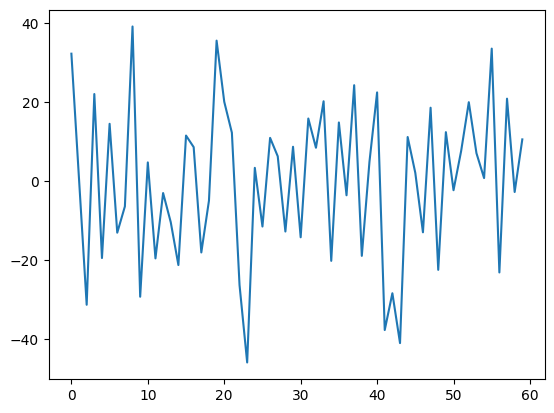

In [15]:
plt.plot(residual)